<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [441]:
# import modules
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, KFold


plt.style.use('fivethirtyeight')
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

Hypothesis:
    
over 50% of the variance in Property Area Land Value can be explained using numerical data from the SF Assessor office.

In [569]:
# Get Data and Column names
assessor = pd.read_csv('./san_francisco/assessor_office/assessor_data_2007_2008.csv')

assessor_columns = pd.read_csv('./san_francisco/assessor_office/assessor_data_key.csv')

assessor_dict = dict(zip(assessor_columns.iloc[:,0], assessor_columns.iloc[:,1]))
assessor_dict['RP1RECDAT1'] = 'RECORDATION DATE'

assessor.rename(columns=assessor_dict, inplace=True)

In [570]:
assessor_columns

,DATA NAME,FIELD NAME,FIELD DESCRIPTION
0,PROPLOC,Property Location,"Situs/Location, as well as room/unit number"
1,RP1NBRCDE,Neighborhood Code,ASR neighborhood code based on MLS districts
2,RP1PRCLID,Block and Lot Number,Block and Lot Number (Full APN)
3,RP1VOLUME,Volume Number,Volume number
4,RP1CLACDE,Property Class Code,Property type
5,YRBLT,Year Property Built,Year improvement was built (can be blend of or...
6,BATHS,Number of Bathrooms,Number of bathrooms (BA with no shower or tub ...
7,BEDS,Number of Bedrooms,Number of bedrooms (bedrooms have a closet)
8,ROOMS,Number of Rooms,"Number of rooms, excluding bathrooms, halls, c..."
9,STOREYNO,Number of Stories,Number of stories


In [571]:
assessor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197778 entries, 0 to 197777
Data columns (total 36 columns):
Property Location                           197778 non-null object
Neighborhood Code                           197667 non-null object
Block and Lot Number                        197778 non-null object
Volume Number                               197778 non-null int64
Property Class Code                         197702 non-null object
Year Property Built                         197778 non-null int64
Number of Bathrooms                         197778 non-null int64
Number of Bedrooms                          197778 non-null int64
Number of Rooms                             197778 non-null int64
Number of Stories                           197778 non-null int64
Number of Units                             197778 non-null int64
Characteristics Change Date (YYMM)          197778 non-null int64
Zoning Code                                 175850 non-null object
Construction Type         

In [572]:
# Drop features with over 50% missing
missing_cols = (assessor.isnull().sum() / assessor.isnull().count()) < .5
assessor = assessor.ix[:, missing_cols]

In [573]:
# Drop rows where Property Area in Square Feet =< 0
print assessor.shape[0]
assessor = assessor[assessor['Property Area in Square Feet'] > 0]
print assessor.shape[0]

197778
178722


In [574]:
# Drop rows where Closed Roll Assessed Land Value =< 0
print assessor.shape[0]
assessor = assessor[assessor['Closed Roll Assessed Land Value'] > 0]
print assessor.shape[0]

178722
175933


In [575]:
assessor.describe()

,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Characteristics Change Date (YYMM),Lot Depth,Lot Frontage,...,Tax Rate Area Code,Percent of Ownership,Closed Roll Misc. Exemption Value,Closed Roll Homeowner Exemption Value,Closed Roll Year,Current Sales Date (YYMMDD),Closed Roll Assessed Fixtures Value,Closed Roll Assessed Improvement Value,Closed Roll Assessed Land Value,Closed Roll Assessed Personal Prop Value
count,175933.000000,175933.000000,175933.000000,175933.000000,175933.000000,175933.000000,175933.000000,175933.000000,175933.000000,175933.000000,...,175809.000000,175933.000000,1.759330e+05,175933.000000,175933.0,175933.000000,1.759330e+05,1.759330e+05,1.759330e+05,1.759330e+05
mean,21.140150,1919.139849,2.507813,0.939693,8.485764,1.496865,1.984807,8578.596642,9.651300,0.044608,...,1000.549414,0.889244,1.705037e+04,3575.696430,7.0,253614.727419,2.544385e+03,3.420665e+05,3.017587e+05,1.866906e+03
std,12.762495,207.105192,8.866584,11.189238,21.814847,3.007055,13.244400,3236.981170,22.776216,1.435180,...,19.250370,0.223956,6.457150e+05,4238.785297,0.0,404758.899464,1.838077e+05,3.170144e+06,1.455615e+06,1.322537e+05
min,1.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1000.000000,0.000000,0.000000e+00,0.000000,7.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,11.000000,1913.000000,1.000000,0.000000,5.000000,1.000000,1.000000,9608.000000,0.000000,0.000000,...,NaN,1.000000,0.000000e+00,0.000000,7.0,0.000000,0.000000e+00,8.201100e+04,5.070300e+04,0.000000e+00
50%,19.000000,1931.000000,2.000000,0.000000,6.000000,1.000000,1.000000,9906.000000,0.000000,0.000000,...,NaN,1.000000,0.000000e+00,7000.000000,7.0,20214.000000,0.000000e+00,1.696660e+05,1.657190e+05,0.000000e+00
75%,33.000000,1957.000000,2.000000,1.000000,8.000000,2.000000,1.000000,9908.000000,0.000000,0.000000,...,NaN,1.000000,0.000000e+00,7000.000000,7.0,870626.000000,0.000000e+00,3.043170e+05,3.433320e+05,0.000000e+00
max,44.000000,9185.000000,1002.000000,3800.000000,3606.000000,963.000000,3146.000000,9912.000000,99.920000,99.390000,...,9000.000000,1.000000,1.204034e+08,777000.000000,7.0,991231.000000,4.665329e+07,6.120000e+08,2.560200e+08,2.736068e+07


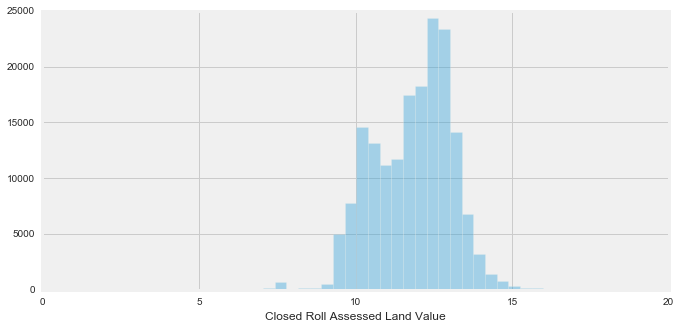

In [576]:
# Log Closed Roll Assessed Land Value Hist
plt.figure(figsize=(10,5))
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rcParams.update({'font.size': 10})
sns.distplot(np.log1p(assessor['Closed Roll Assessed Land Value']), kde=False)
plt.show()

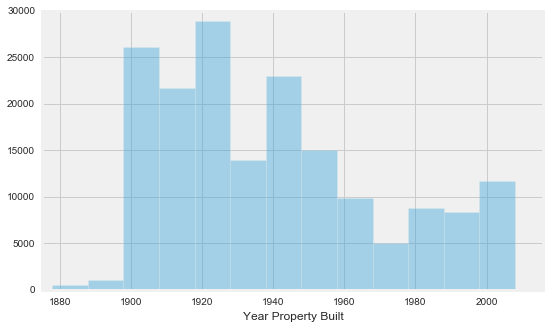

In [577]:
# Year Built Hist
year_nonzero = assessor['Year Property Built'][(assessor['Year Property Built'] > 0) & (assessor['Year Property Built'] <= 2016)]
plt.figure(figsize=(8,5))
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rcParams.update({'font.size': 10})
plt.xlim(1875, 2016)
sns.distplot(year_nonzero, kde=False, bins=200)
plt.show()

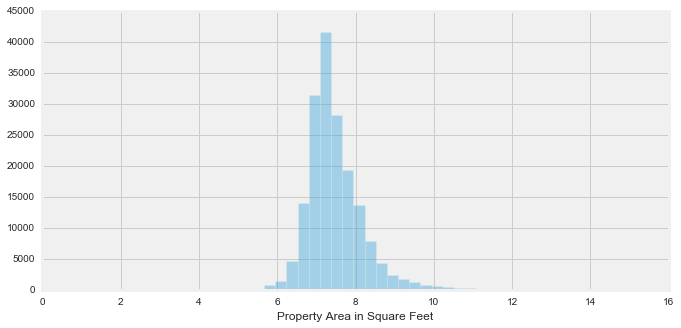

In [578]:
# Log Property Area in Square Feet
log_real_property = np.log1p(assessor['Property Area in Square Feet'])

plt.figure(figsize=(10,5))
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rcParams.update({'font.size': 10})
sns.distplot(log_real_property, kde=False)
plt.show()

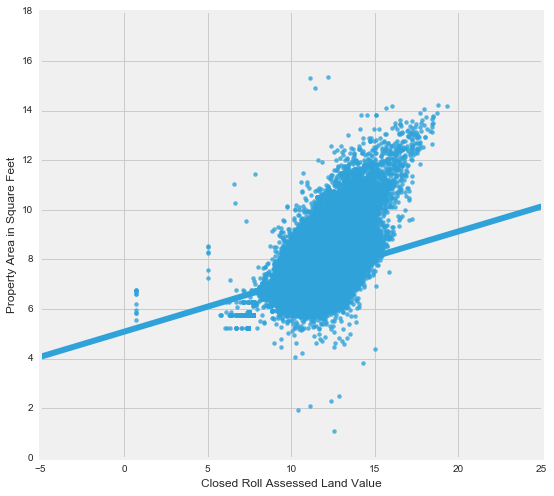

In [579]:
# Land Value vs Property Area Scatter
land_value_log = np.log1p(assessor['Closed Roll Assessed Land Value'])
area_sqft_log = np.log1p(assessor['Property Area in Square Feet'])
plt.figure(figsize=(8,8))
sns.regplot(land_value_log, area_sqft_log)

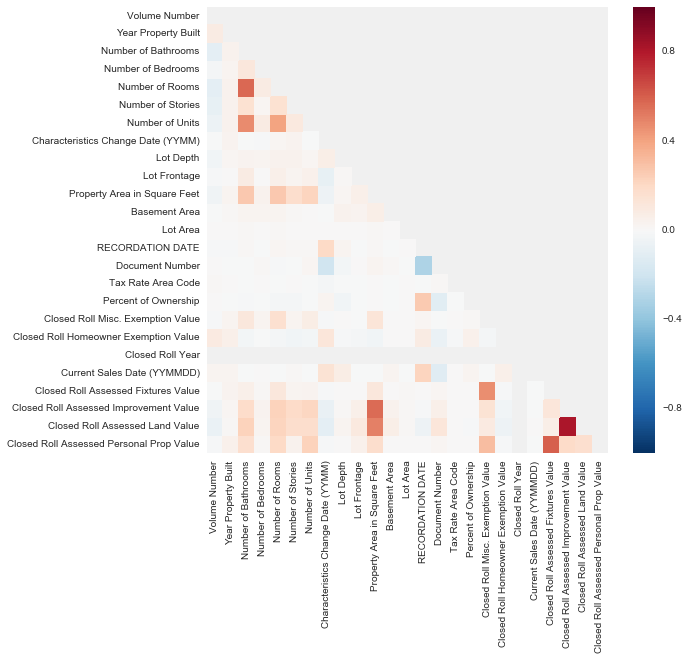

In [580]:
#Correlation Heatmap
assessor_num = assessor.select_dtypes(exclude=['object'])
corr_matrix = assessor_num.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, mask=mask)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- **Visualize the evaluation metrics of your analysis in clear charts.**
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [581]:
# Drop Unnecessary Columns
drop_columns = ['Volume Number','Characteristics Change Date (YYMM)', 'RECORDATION DATE', 
                'Document Number', 'Tax Rate Area Code', 'Closed Roll Year','Current Sales Date (YYMMDD)']

assessor_num.drop(drop_columns, axis=1, inplace=True)

/Users/nehemiahloury/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [582]:
# Drop Outliers
assessor_num = assessor_num[(assessor_num['Year Property Built'] > 1776) & (assessor_num['Year Property Built'] < 2017)]
assessor_num = assessor_num[assessor_num['Number of Rooms'] > 0]
assessor_num = assessor_num[assessor_num['Basement Area'] >= 0]
assessor_num = assessor_num[assessor_num['Number of Bedrooms'] < assessor_num['Number of Rooms']]
assessor_num.describe()
assessor_num.shape[0]

163600

In [583]:
# Build the Regression
target = assessor_num['Closed Roll Assessed Land Value'].reset_index(drop=True)
X = assessor_num.ix[:, assessor_num.columns != 'Closed Roll Assessed Land Value'].reset_index(drop=True)
base_lr = linear_model.LinearRegression(normalize=True)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, target) 
base_lr.fit(X_train, y_train)
predictions = base_lr.predict(X_test)
R2 = base_lr.score(X_test, y_test)
print "R^2 = ", R2

R^2 =  0.465834642444


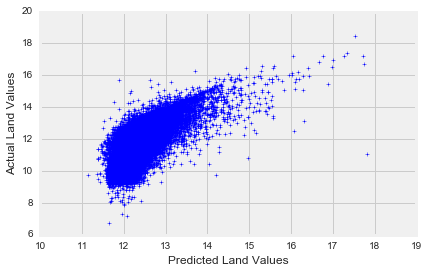

In [584]:
# Plot 
plt.scatter(np.log1p(predictions), np.log1p(y_test), s=20, c='b', marker='+')
plt.xlabel("Predicted Land Values")
plt.ylabel("Actual Land Values")
plt.figure(figsize=(8,8))
plt.show()

In [702]:
# KFolds
print X.shape[0]
kfolds = KFold(X.shape[0], n_folds=5)
R2_scores = []
for traini, testi in kfolds:
    kfolds_lr = linear_model.LinearRegression(normalize=True)
    X_train, X_test = X.ix[traini,:], X.ix[testi,:]
    y_train, y_test = target[traini], target[testi]
    kfolds_lr.fit(X_train, y_train)
    score = base_lr.score(X_test, y_test)
    R2_scores.append(score)

163600


In [703]:
print R2_scores
print np.mean(R2_scores)
print R2

[0.594198294661616, 0.35828019853344628, 0.35465611545420883, 0.31202677522812328, 0.45206701745773314]
0.414245680267
0.465834642444


We see that the R^2 for our train test split is about the same as the average from our KFold Cross Validation. That suggests that our specific split was fairly representative of the data as a whole.

It appears that at least with our current model/data we are only able to account for about 46% of the variability in the land value.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

1. That means that the regression model is even less accurate the baseline of just estimating the value with the mean. More specifically, the residual sum of squares is larger than the total sum of squares. Definitely not something that you want to happen in most cases.
2. R^2 can only be negative when the model is tested on new data because the way you train the model is to try and minimize the sum of squared errors on the training data, which guarantees that the residual sum of squares will be less than the total.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


Hypothesis: Park Scores have improved overall from 2007 to 2014

In [479]:
# Read in data
park_info = pd.read_csv('./san_francisco/parks/park_info.csv')
park_scores = pd.read_csv('./san_francisco/parks/park_scores.csv')

In [480]:
# Drop Unnecessary Columns
park_info.drop(['ParkName', 'ParkServiceArea', 'PSAManager', 'email', 
                'Number', 'Zipcode', 'Location 1', 'Lat'], axis=1, inplace=True)

In [481]:
# Fill in SupDist Column
park_info.ix[:,'SupDist'].fillna(value=park_info['SupDist'].median(), inplace=True)

In [482]:
# Drop NAs and prepare to merge datasets
park_info.dropna(inplace=True)
park_info['ParkID'] = park_info['ParkID'].apply(lambda x: int(x))
park_scores['ParkID'] = park_scores['ParkID'].apply(lambda x: int(x))

In [483]:
# Join Datasets
park = park_scores.join(park_info, on='ParkID', how='inner', rsuffix='_info').reset_index(drop=True)
park.head()

,ParkID,PSA,Park,FQ,Score,ParkType,Acreage,SupDist,ParkID_info
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795,Mini Park,0.08,5.0,120
1,86,PSA4,Carl Larsen Park,FY06Q1,0.813,Mini Park,0.08,5.0,120
2,86,PSA4,Carl Larsen Park,FY06Q2,0.256,Mini Park,0.08,5.0,120
3,86,PSA4,Carl Larsen Park,FY06Q4,0.648,Mini Park,0.08,5.0,120
4,86,PSA4,Carl Larsen Park,FY07Q2,0.716,Mini Park,0.08,5.0,120


In [484]:
# Clean Joined Dataset
park['Quarter'] = park['FQ'].apply(lambda x: x[-1])
park['Year'] = park['FQ'].apply(lambda x: x[:4])
park['Year'] = park['Year'].apply(lambda x: x.replace('FY', '20'))
park['Year'] = pd.to_datetime(park['Year']).dt.year
park.drop(labels=['ParkID_info', 'FQ', 'Park'], axis=1, inplace=True)
park.dropna(inplace=True)

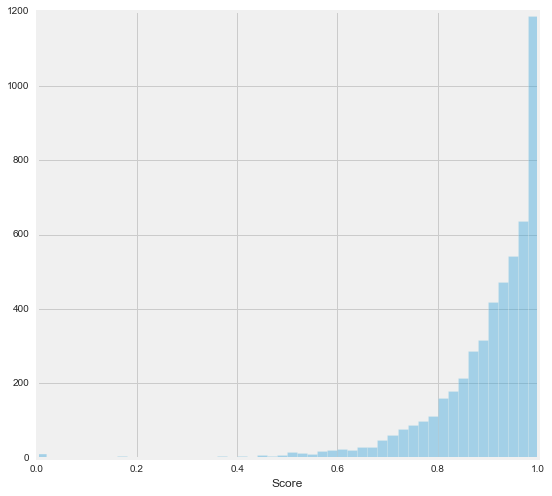

In [485]:
# Plot Distribution of Scores
plt.figure(figsize=(8,8))
sns.distplot(park['Score'], kde=False)

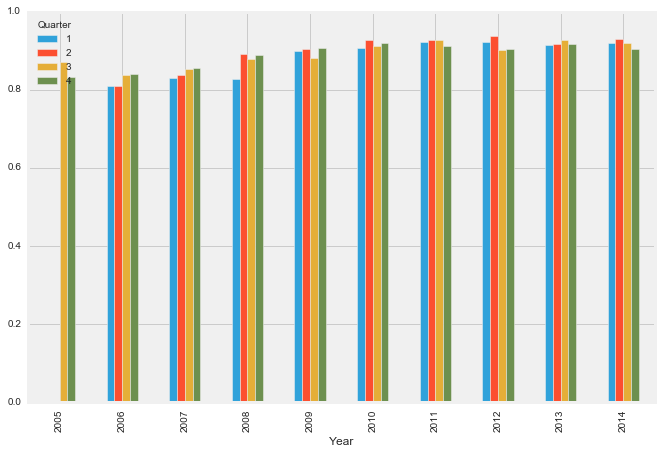

In [486]:
# Plot Mean Scores by Year and Quarter
park.groupby(by=['Year', 'Quarter'])['Score'].mean().unstack().plot(kind='bar', figsize = (10,7))

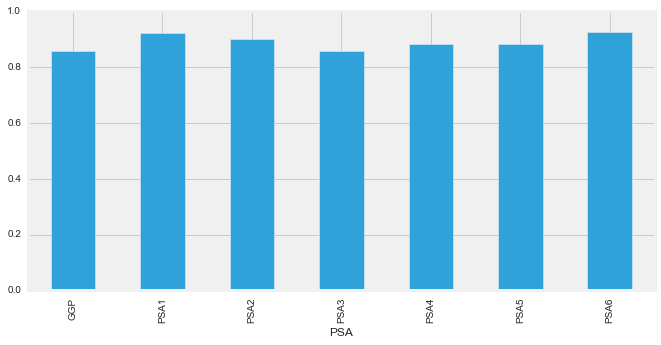

In [487]:
# Plot Mean Scores by PSA
park.groupby(by=['PSA'])['Score'].mean().plot(kind='bar', figsize = (10,5))

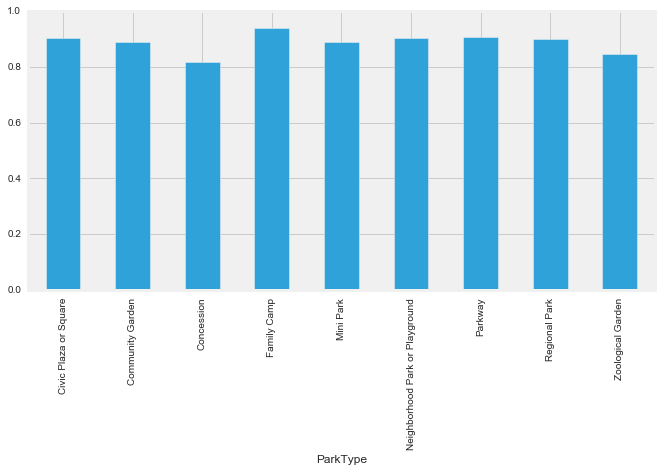

In [488]:
# Plot Mean Scores by Park Type
park.groupby(by=['ParkType'])['Score'].mean().plot(kind='bar', figsize = (10,5))

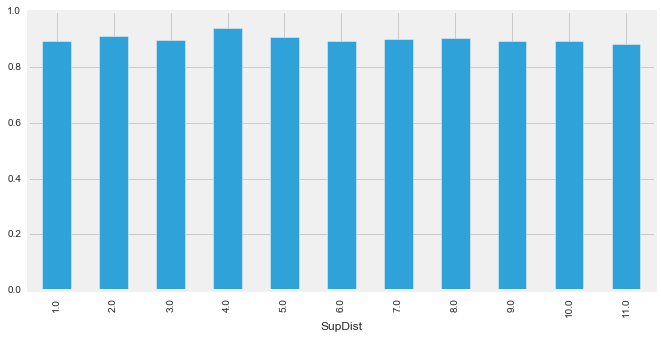

In [489]:
# Plot Mean Scores by SupDist
park.groupby(by=['SupDist'])['Score'].mean().plot(kind='bar', figsize = (10,5))

In [490]:
# Make Categorical Variables into Dummies
def dummy_df(df):
    train_dummy = pd.DataFrame()
    
    for column in  df.columns:
        column_dummy = pd.get_dummies(df[column])
        train_dummy = pd.concat([train_dummy, column_dummy], axis=1)
    return train_dummy

park_cat = park.ix[:,['PSA', 'ParkType']]
park_dummy = dummy_df(park_cat)

In [491]:
# Concatenate dummy dataframe with original and drop old columns
park = pd.concat([park, park_dummy], axis=1).drop(['PSA', 'ParkType'], axis=1)

In [492]:
# Split into target and predictors
park_y = park['Score']
park_predictor = park.ix[:, ~park.columns.isin(['Score', 'ParkID'])]

In [493]:
# Normalize Dataset
from sklearn.preprocessing import StandardScaler
park_ss = StandardScaler()
park_norm = park_ss.fit_transform(park_predictor)

In [704]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(park_norm, park_y)
park_lr = linear_model.LinearRegression()
park_lr.fit(X_train, y_train)
y_pred = park_lr.predict(X_test)
score = park_lr.score(X_test, y_test)

print 'Baseline', np.sqrt(mean_squared_error(y_test, [np.mean(y_test) for x in y_test]))
print 'Training: ', np.sqrt(mean_squared_error(y_train, park_lr.predict(X_train)))
print 'Testing: ', np.sqrt(mean_squared_error(y_test, park_lr.predict(X_test)))
print 'R^2', score

Baseline 0.105715959036
Training:  0.113327312281
Testing:  0.102164261824
R^2 0.0660644761836


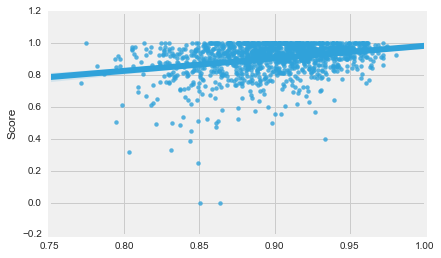

In [705]:
sns.regplot(y_pred, y_test)

In [706]:
# Ridge Regression
park_ridge = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10,100,200,300], cv=3)
park_ridge.fit(X_train, y_train)

y_train_ridge_pred = park_ridge.predict(X_train)
y_test_ridge_pred = park_ridge.predict(X_test)
ridge_score = park_ridge.score(X_test, y_test)

print "Lambda Value:", park_ridge.alpha_
print 'Baseline', np.sqrt(mean_squared_error(y_test, [np.mean(y_test) for x in y_test]))
print 'Training: ', np.sqrt(mean_squared_error(y_train, y_train_ridge_pred))
print 'Testing: ', np.sqrt(mean_squared_error(y_test, y_test_ridge_pred))
print 'R^2: ', ridge_score

Lambda Value: 300
Baseline 0.105715959036
Training:  0.113358354162
Testing:  0.101954188076
R^2:  0.0699013095517


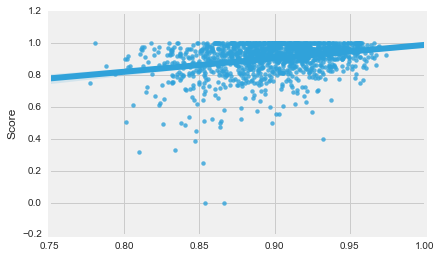

In [707]:
sns.regplot(y_test_ridge_pred, y_test)

In [708]:
# Lasso Regression
park_lasso = linear_model.LassoCV(alphas=[0.001,0.01,0.1,1,10,100], cv=3)
park_lasso.fit(X_train, y_train)

y_train_lasso_pred = park_lasso.predict(X_train)
y_test_lasso_pred = park_lasso.predict(X_test)
lasso_score = park_lasso.score(X_test, y_test)

print "Lambda Value:", park_lasso.alpha_
print 'Training: ', np.sqrt(mean_squared_error(y_train, y_train_lasso_pred))
print 'Testing: ', np.sqrt(mean_squared_error(y_test, y_test_lasso_pred))
print 'R^2: ', lasso_score

Lambda Value: 0.001
Training:  0.113418256231
Testing:  0.101800425695
R^2:  0.0727046538423


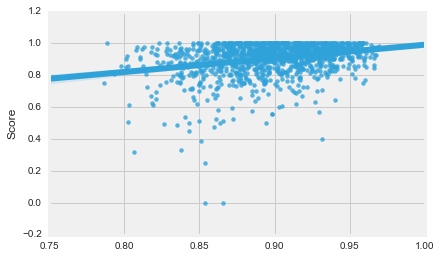

In [709]:
sns.regplot(y_test_lasso_pred, y_test)

In [710]:
# Elastic Net Regression
park_enet = linear_model.ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.99], n_alphas=100, cv=3)
park_enet.fit(X_train, y_train)

y_train_enet_pred = park_enet.predict(X_train)
y_test_enet_pred = park_enet.predict(X_test)
enet_score = park_enet.score(X_test, y_test)

print "Lambda Value:", park_enet.alpha_
print 'Training: ', np.sqrt(mean_squared_error(y_train, y_train_enet_pred))
print 'Testing: ', np.sqrt(mean_squared_error(y_test, y_test_enet_pred))
print 'R^2: ', enet_score

Lambda Value: 0.00145606879614
Training:  0.113493058682
Testing:  0.101713829681
R^2:  0.0742815809832


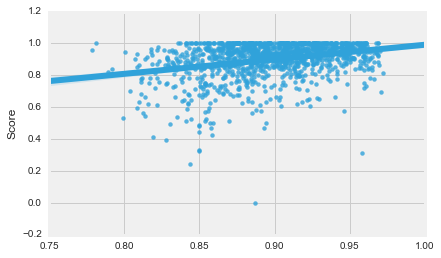

In [451]:
sns.regplot(y_test_enet_pred, y_test)

In [711]:
pd.concat(parkpark_enet.coef_

array([-0.00221422, -0.0047703 ,  0.0006168 ,  0.02695263, -0.        ,
        0.00981474,  0.00225911, -0.0126556 , -0.00382736, -0.00172275,
        0.00847151, -0.        , -0.00061759, -0.0046902 ,  0.00011309,
       -0.        ,  0.        ,  0.00032046,  0.        , -0.00112115])

Looks like Elastic Net is the top performer, though none of 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [527]:
# Get Data and Column names
assessor_2007 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2007_2008.csv')
assessor_2008 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2008_2009.csv')
assessor_2009 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2009_2010.csv')
assessor_2010 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2010_2011.csv')
assessor_2011 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2011_2012.csv')
assessor_2012 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2012_2013.csv')
assessor_2013 = pd.read_csv('./san_francisco/assessor_office/assessor_data_2013_2014.csv')

assessor_columns = pd.read_csv('./san_francisco/assessor_office/assessor_data_key.csv')

assessor_dict = dict(zip(assessor_columns.iloc[:,0], assessor_columns.iloc[:,1]))
assessor_dict['RP1RECDAT1'] = 'RECORDATION DATE'

In [609]:
# Make Single Dataframe
assessor = pd.concat([assessor_2007,assessor_2008,assessor_2009,assessor_2010,assessor_2011,
                         assessor_2012,assessor_2013])
assessor.rename(columns=assessor_dict, inplace=True)

In [610]:
# Drop Columns with over 50% missing values or mostly zero values
missing_columns = assessor.isnull().sum()/assessor.isnull().count() > .5
assessor = assessor.ix[:, ~missing_columns]

In [611]:
# Drop Nonsensical Values
print assessor.shape[0]
assessor = assessor[assessor['Property Area in Square Feet'] > 0]
assessor = assessor[assessor['Closed Roll Assessed Land Value'] > 0]
assessor = assessor[(assessor['Year Property Built'] > 1776) & (assessor['Year Property Built'] < 2016)]
assessor = assessor[assessor['Number of Rooms'] > 0]
assessor = assessor[assessor['Basement Area'] >= 0]
assessor = assessor[assessor['Number of Bedrooms'] < assessor['Number of Rooms']]
print assessor.shape[0]

1405294
1166009


In [614]:
# Drop Categorical Variables
assessor = assessor.select_dtypes(exclude=['object'])
assessor.columns

Index([u'Volume Number', u'Year Property Built', u'Number of Bathrooms',
       u'Number of Bedrooms', u'Number of Rooms', u'Number of Stories',
       u'Number of Units', u'Characteristics Change Date (YYMM)', u'Lot Depth',
       u'Lot Frontage', u'Property Area in Square Feet', u'Basement Area',
       u'Lot Area', u'RECORDATION DATE', u'Document Number',
       u'Tax Rate Area Code', u'Percent of Ownership',
       u'Closed Roll Misc. Exemption Value',
       u'Closed Roll Homeowner Exemption Value', u'Closed Roll Year',
       u'Current Sales Date (YYMMDD)', u'Closed Roll Assessed Fixtures Value',
       u'Closed Roll Assessed Improvement Value',
       u'Closed Roll Assessed Land Value',
       u'Closed Roll Assessed Personal Prop Value'],
      dtype='object')

In [615]:
# Drop Unnecessary Numerical Columns
assessor = assessor.drop(['Volume Number', 'Characteristics Change Date (YYMM)', 'RECORDATION DATE', 
                          'Document Number', 'Tax Rate Area Code', 'Percent of Ownership', 'Closed Roll Year', 
                          'Current Sales Date (YYMMDD)'], axis=1)

In [616]:
# Add Log Closed Roll Assessed Improvement Value
assessor['Log Closed Roll Assessed Improvement Value'] = np.log1p(assessor['Closed Roll Assessed Improvement Value'])

In [617]:
# Split target and predictor Dataframe
ass_y = np.log1p(assessor['Closed Roll Assessed Land Value'].reset_index(drop=True))
ass_X = assessor.ix[:,~assessor.columns.isin(['Closed Roll Assessed Land Value'])].reset_index(drop=True)
ass_X

,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,Property Area in Square Feet,Basement Area,Lot Area,Closed Roll Misc. Exemption Value,Closed Roll Homeowner Exemption Value,Closed Roll Assessed Improvement Value,Log Closed Roll Assessed Improvement Value
0,1974,7,0,36,4,29,75.00,0.0,198525,0.0,57750.00,0.0,0.0,52020000.0,17.767139
1,1953,12,0,19,2,4,37.50,0.0,24627,0.0,18906.25,0.0,0.0,3959693.0,15.191677
2,1921,7,0,9,1,3,37.50,0.0,7073,0.0,63020.38,0.0,0.0,655352.0,13.392929
3,1948,2,0,5,1,1,36.00,0.0,6800,0.0,6800.00,0.0,0.0,725764.0,13.494982
4,1948,8,0,2,1,1,80.00,0.0,4000,0.0,11000.00,0.0,0.0,349138.0,12.763225
5,1948,5,0,1,1,1,70.00,0.0,3500,0.0,9625.00,0.0,0.0,160697.0,11.987282
6,1986,2,0,2,1,2,50.00,0.0,2500,0.0,6875.00,0.0,0.0,397825.0,12.893770
7,1937,4,0,11,2,1,75.00,0.0,15397,0.0,10312.50,0.0,0.0,455053.0,13.028171
8,1946,6,0,4,1,3,87.50,0.0,3281,0.0,3281.25,0.0,0.0,185350.0,12.130007
9,1974,2,0,7,4,2,37.50,0.0,81488,0.0,18906.25,0.0,0.0,1960955.0,14.488943


In [618]:
# Linear Regression
ass_X_train, ass_X_test, ass_y_train, ass_y_test = train_test_split(ass_X, ass_y)
ass_lr = linear_model.LinearRegression()
ass_lr.fit(ass_X_train, ass_y_train)
ass_y_pred = ass_lr.predict(ass_X_test)
ass_lr_score = ass_lr.score(ass_X_test, ass_y_test)

ass_y_test_mean = np.mean(ass_y_test)
print 'Baseline: ', np.sqrt(mean_squared_error(ass_y_test, [ass_y_test_mean for x in ass_y_test]))
print 'Training: ', np.sqrt(mean_squared_error(ass_y_train, ass_lr.predict(ass_X_train)))
print 'Testing: ', np.sqrt(mean_squared_error(ass_y_test, ass_lr.predict(ass_X_test)))
print 'R^2', ass_lr_score

Baseline:  1.22523227938
Training:  0.745142320143
Testing:  0.74402597855
R^2 0.6312437928


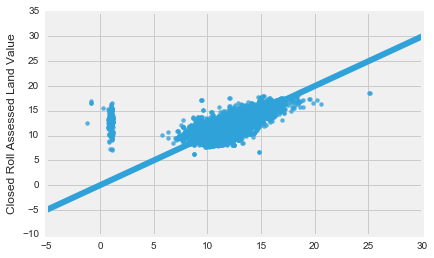

In [620]:
sns.regplot(ass_y_pred, ass_y_test)

Looks like there is a subset of predictions that are way off. These might be worth investigating to see where the model went wrong.

In [621]:
# Ridge Regression
ass_ridge = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10,100], cv=3)
ass_ridge.fit(ass_X_train, ass_y_train)

ass_y_train_ridge_pred = ass_ridge.predict(ass_X_train)
ass_y_test_ridge_pred = ass_ridge.predict(ass_X_test)
ass_ridge_score = ass_ridge.score(ass_X_test, ass_y_test)

print "Lambda Value:", ass_ridge.alpha_
print 'Baseline', np.sqrt(mean_squared_error(ass_y_test, [ass_y_test_mean for x in ass_y_test]))
print 'Training: ', np.sqrt(mean_squared_error(ass_y_train, ass_y_train_ridge_pred))
print 'Testing: ', np.sqrt(mean_squared_error(ass_y_test, ass_y_test_ridge_pred))
print 'R^2: ', ass_ridge_score

Lambda Value: 0.001
Baseline 1.22523227938
Training:  0.745142320143
Testing:  0.74402597855
R^2:  0.631243792799


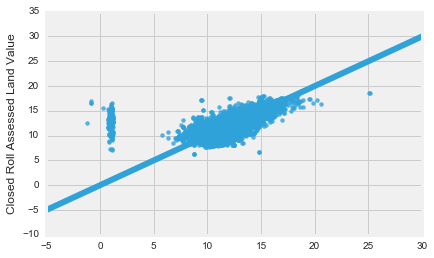

In [623]:
sns.regplot(ass_y_test_ridge_pred, ass_y_test)

In [622]:
# Lasso Regression
ass_lasso = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10,100], cv=3)
ass_lasso.fit(ass_X_train, ass_y_train)

ass_y_train_lasso_pred = ass_lasso.predict(ass_X_train)
ass_y_test_lasso_pred = ass_lasso.predict(ass_X_test)
ass_lasso_score = ass_lasso.score(ass_X_test, ass_y_test)

print "Lambda Value:", ass_lasso.alpha_
print 'Baseline', np.sqrt(mean_squared_error(ass_y_test, [ass_y_test_mean for x in ass_y_test]))
print 'Training: ', np.sqrt(mean_squared_error(ass_y_train, ass_y_train_lasso_pred))
print 'Testing: ', np.sqrt(mean_squared_error(ass_y_test, ass_y_test_lasso_pred))
print 'R^2: ', ass_lasso_score

Lambda Value: 0.001
Baseline 1.22523227938
Training:  0.745142320143
Testing:  0.74402597855
R^2:  0.631243792799


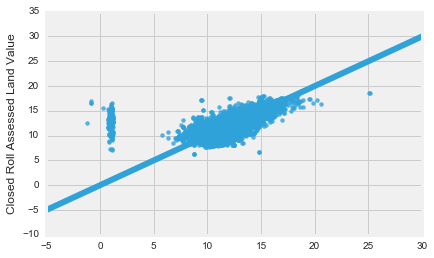

In [624]:
sns.regplot(ass_y_test_lasso_pred, ass_y_test)

It appears that there is not much difference in performance between the various models. Apparently the optimal amount of regularization is quite small, which is shown by the small lamdba values selected by gridsearch.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

In [659]:
# Park Ridge regression coefficients as a function of hyperparameter alpha
alphas = np.logspace(-1, 3, 20)
ass_coef = linear_model.Ridge()

coefs = []
for a in alphas:
    ass_coef.set_params(alpha=a)
    ass_coef.fit(park_predictor, park_y)
    coefs.append(ass_coef.coef_)

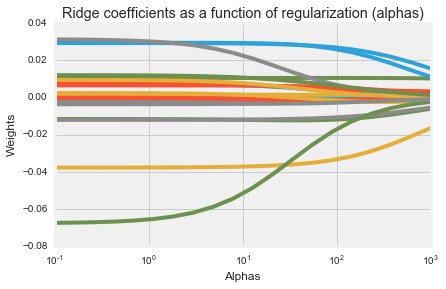

In [716]:
# Ridge Regression Plot
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Weights')
plt.title('Ridge coefficients as a function of regularization (alphas)')
plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
1. What biases are being caused here?
2. How would you measure the success of such a program?
3. Rephrase this question to be unbiased
4. Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?

1. The types of users that the app will receive are likely to tech savvy and also in the social circles of people who tend to use new technology, which means that it might not be representative of the population as a whole. Also, the incentives are aligned such that it encourages people who care about free orders (i.e. economically conscious and use the app a lot).
2. I would measure the success by the amount of revenue gained against the resources spent to give people free orders. Since, their friends are not required to order, but just to sign up, it seems possible that this promotion might actually lose money without attracting new, **active** users.
3. It's a statement, not a question...
4. Yes, though I may be bias because I grew up in a community where gun ownership was frowned upon. Pretty sure however, that the data bears out the fact that increased gun ownership increases the likelihood of violent crime.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data that Ferris used in class: 
- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [661]:
health_data = pd.read_csv('http://assets.datacamp.com/blog_assets/chol.txt', sep=' ')

In [664]:
health_HW = health_data[['HEIGHT', 'WEIGHT']]

In [665]:
# Summary Statistics
health_HW.describe()

,HEIGHT,WEIGHT
count,200.00000,200.000000
mean,172.35000,75.885000
std,6.77399,10.442076
min,156.00000,53.000000
25%,168.00000,68.750000
50%,172.00000,75.000000
75%,176.00000,82.000000
max,191.00000,110.000000


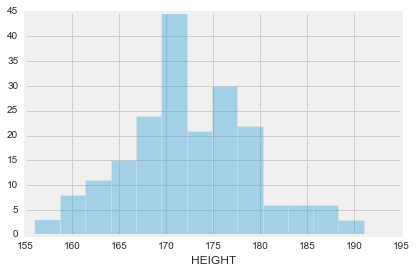

In [684]:
# Height Histogram
height = health_HW['HEIGHT']
sns.distplot(height, kde=False)

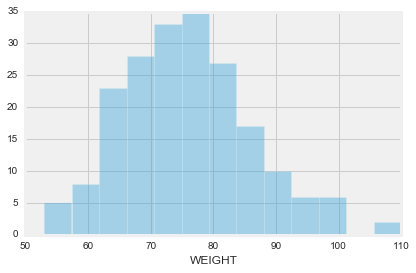

In [670]:
# Weight Histogram
weight = health_HW['WEIGHT']
sns.distplot(weight, kde=False)

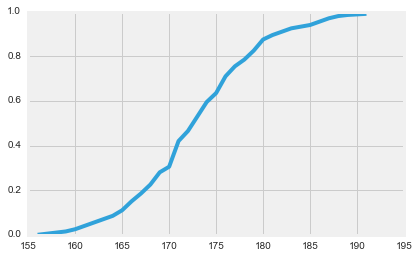

In [685]:
# Weight CDF Plot
from __future__ import division
uni_height = height.unique()
uni_height.sort()
cdf_height = [sum(height < h)/len(height) for h in uni_height]

plt.plot(uni_height, cdf_height)

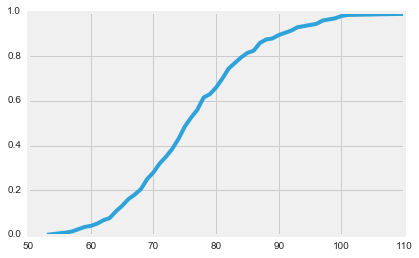

In [682]:
# Weight CDF Plot
from __future__ import division
uni_weight = weight.unique()
uni_weight.sort()
cdf_weight = [sum(weight < w)/len(weight) for w in uni_weight]
plt.plot(uni_weight, cdf_weight)

In [695]:
# Set up Mortality
health_data.ix[:, 'MORT'] = health_data.ix[:, 'MORT'].replace(to_replace={'alive': 1, 'dead': 0})
health_data['SMOKER'] = health_data.ix[:, 'SMOKE'].replace(to_replace={'nonsmo': 0, 'pipe': 1, 'sigare': 1})

In [696]:
# Mortality: Smokers vs Non Smokers
health_data.groupby('SMOKER')['MORT'].mean()

SMOKER
0    0.918367
1    0.867550
Name: MORT, dtype: float64

In [701]:
# Two tailed T-test for weight
stats.ttest_1samp(weight, 85)

Ttest_1sampResult(statistic=-12.344821194685455, pvalue=2.2901936138582111e-26)

Since our p-vale is so small, we can be reasonably sure that our sample weight is significantly differently than the national average. Seeing that the T-statistic is negative and p/2 is even smaller than our original p, we state that our mean weight is significantly less than the national average.